In [1]:
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import numpy as np


In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
tables = pd.read_html(html)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [6]:
type(tables)

list

In [7]:
mars_df = tables[0]
mars_df.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [8]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [9]:
mars_df.terrestrial_date = mars_df.terrestrial_date.astype('datetime64')

In [10]:
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

# How many months exist on Mars?

In [11]:
total_months = mars_df['month'].value_counts()
total_months.sort_index()


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

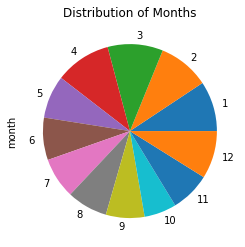

In [68]:

total_months.sort_index().plot.pie(title="Distribution of Months")
plt.show()

# Which month, on average, has the lowest temperature? The highest?


In [39]:
temp_avg = mars_df.groupby(mars_df["month"]).min_temp.agg([
                                                                        "mean"
                                                                        ])

temp_avg

,mean
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


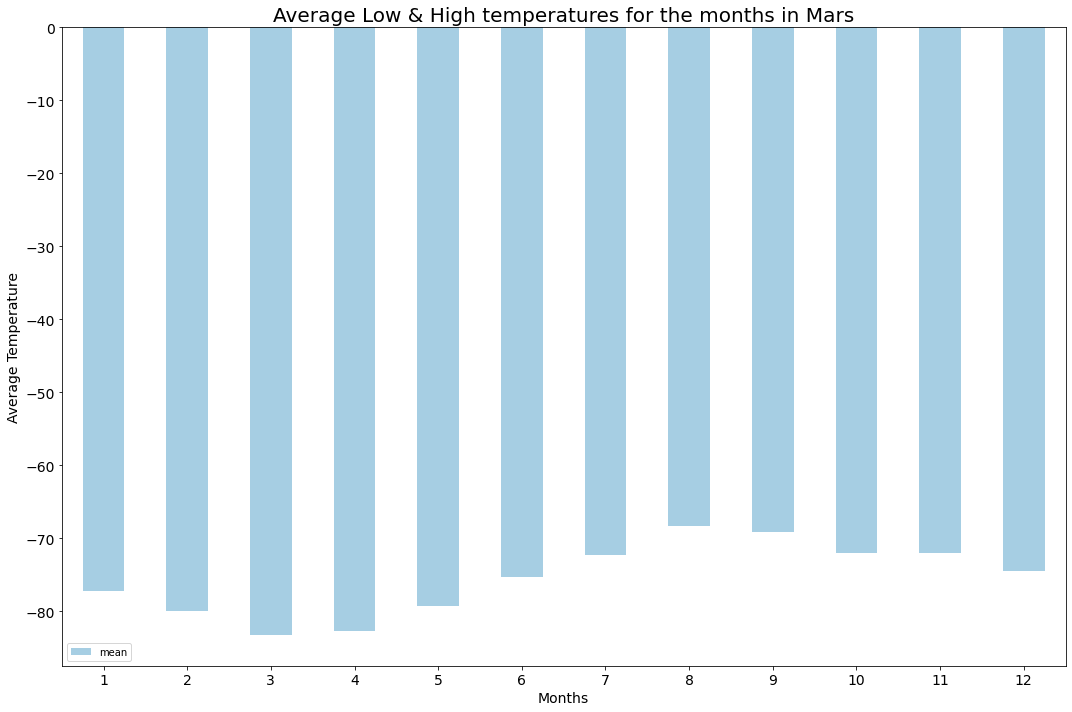

In [61]:
plot_pandas = temp_avg.plot(kind="bar", figsize=(15,10), colormap='Paired',fontsize = 14,rot=0)

plt.xlabel("Months",fontsize = 14)
plt.ylabel("Average Temperature",fontsize = 14)
plt.title("Average Low & High temperatures for the months in Mars",fontsize = 20)

plt.tight_layout()
plt.show()

# Which month, on average, has the lowest atmospheric pressure? The highest?


In [52]:
pressure_avg = mars_df.groupby(mars_df["month"]).pressure.agg([
                                                                        "mean"
                                                                        ])

pressure_avg

,mean
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


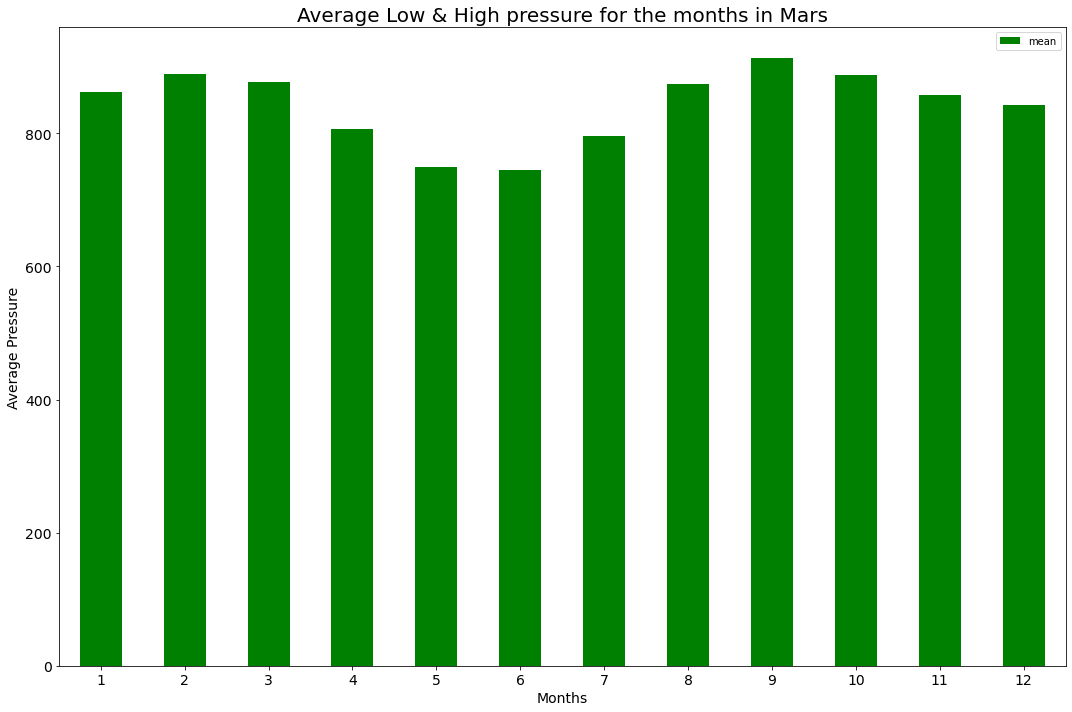

In [66]:
plot_pres= pressure_avg.plot(kind="bar", figsize=(15,10),color='green',fontsize = 14,rot=0)

plt.xlabel("Months",fontsize = 14)
plt.ylabel("Average Pressure",fontsize = 14)
plt.title("Average Low & High pressure for the months in Mars",fontsize = 20)

plt.tight_layout()
plt.show()

# How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.